# 01 - Taller Keras NN's

* Estructura de los modelos en keras, capas.

* Sequential es el modelo más simple, consiste en una pila de capas

* Arquitecturas más complejas API Keras


Instalar Keras

In [ ]:
pip install keras

In [1]:
import keras 

Using TensorFlow backend.
C:\Users\h_air\.julia\conda\3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\h_air\.julia\conda\3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\h_air\.julia\conda\3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\h_air\.julia\conda\3\lib\site-packages\tensorflow\python

In [2]:
import keras
print('backend :', keras.backend.backend())
print('keras version :', keras.__version__)

backend : tensorflow
keras version : 2.2.5


para ver si estamos utilizando CPU o GPU

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

### Modelo Secuencial
Declara modelo secuencial

In [ ]:
from keras.models import Sequential

model = Sequential()

* apilar capas al modelo con ".add()"

In [ ]:
from keras.layers import Dense

model.add(Dense(units = 64, activation = "relu", input_dim = 100))
model.add(Dense(units= 10, activation ="softmax"))

* input_shape -> argumento a la primera capa. ( la dimensión del lote no está incluida.)



### Selección parámetros de entrenamiento:

* **optimizer**: método de optimización

* **loss (función de pérdida)**: Función abjetivo a minimizar 

* **metrics**: lista de métricas a monitorear durante el proceso de entrenamiento

In [ ]:
model.compile(loss = "categorical_crossentropy", # función de costo
             optimizer = "sgd",                  # método de optimización
             metrics = ["accuracy"])             # metrica de monitoreo

* se puede configurar el compilador, seleccionar el algoritmo de optimización

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, 
                                             momentum=0.9, 
                                             nesterov=True))


**Función de perdida:**

* mean_squared_error

* mean_absolute_error

* mean_absolute_percentage_error

* mean_squared_logarithmic_error

* squared_hinge

* hinge

* categorical_hinge

* logcosh

* categorical_crossentropy

* sparse_categorical_crossentropy

* binary_crossentropy

* kullback_leibler_divergence

* poisson

* cosine_proximity

ver : https://keras.io/losses/

**Optimizador:** 

* SGD

* RMSprop

* Adagrad

* Adadelta

* Adam

* Adamax

* Nadam

ver : https://keras.io/optimizers/

ver: http://ruder.io/optimizing-gradient-descent/index.html#fn:6

### Entrenamiento

Ahora puede iterar sobre sus datos de entrenamiento en lotes

In [ ]:
model.fit(x_train, y_train, epoch = 5, batch_size = 32)

**Otros parámetros:**

* validation_split

* validation_data

* shuffle

* class_weight

* sample_weight

* initial_epoch

* steps_per_epoch

* validation_steps

* verbose

* callbacks: Lista de funciones callback a invocarse durante el entrenamiento para monitorear estados internos del modelo durante el entrenamiento

ver: https://keras.io/models/sequential/

**Epoca**: una epoca es cuando todo el conjunto de datos se pasa hacia adelante y hacia atrás a través de la red neuronal solo UNA VEZ

**Batch Size**: Número total de ejemplos de entrenamientos en un solo lote

**Iteración**: es el número de lotes necesarios para completar una epoca

Ejemplo: suponga que tenemos 2000 datos de entrenamiento. Podemos dividir el conjunto de datos en lotes de 500, entonces nos toma 4 iteraciones parta completar una epoca.


* Se puede entrenar por lotes de manera manual

In [ ]:
model.train_on_batch(x_batch, y_batch)

* evalua el desempeño

In [ ]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

**Otras metricas:**
    
* Precisión -> precision_score(y_pred_label, y_test_label, average='macro')

* Recall -> recall_score(y_pred_label, y_test_label,  average='macro')

* F1-score -> f1_score(y_pred_label, y_test_label,  average='macro') -> 

* Coeficiente kappa de Cohen -> cohen_kappa_score(y_pred_label, y_test_label)

* genera predicción sobre datos de prueba

In [ ]:
classes = model.predict(x_test, batch_size=128)

## Ejemplo

### Red Neuronal

Se importa el conjunto de datos de la famosa base MNIST

In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print("Datos de entrenamiento:", train_images.shape)
print("Etiquetas datos de entrenamiento:", len(train_labels))

print("Datos de prueba:", test_images.shape)
print("Etiquetas datos de prueba:", len(test_labels))

Datos de entrenamiento: (60000, 28, 28)
Etiquetas datos de entrenamiento: 60000
Datos de prueba: (10000, 28, 28)
Etiquetas datos de prueba: 10000


In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Pre- proceso

In [7]:
 train_images.reshape((60000, 28 * 28)).shape

(60000, 784)

* Estructura de la muestra

In [8]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.hist(train_labels[:], bins=10)
plt. title('Conteo de las etiquetas del conjunto de entrenamiento')
plt.subplot(212)
plt.hist(test_labels[:], bins=10)
plt. title('Conteo de las etiquetas del conjunto de prueba')
plt.show()

<Figure size 1000x1000 with 2 Axes>

* Visualización

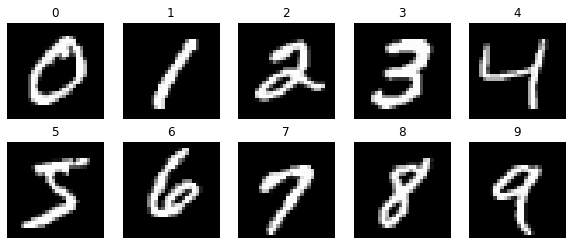

In [8]:
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    idx = list(train_labels).index(i)
    plt.imshow(train_images[idx], 'gray')
    plt.title(train_labels[idx])
    plt.axis('off')
    
plt.show()

* Las primeras 400's ocurencias de los dígitos del 1 al 7

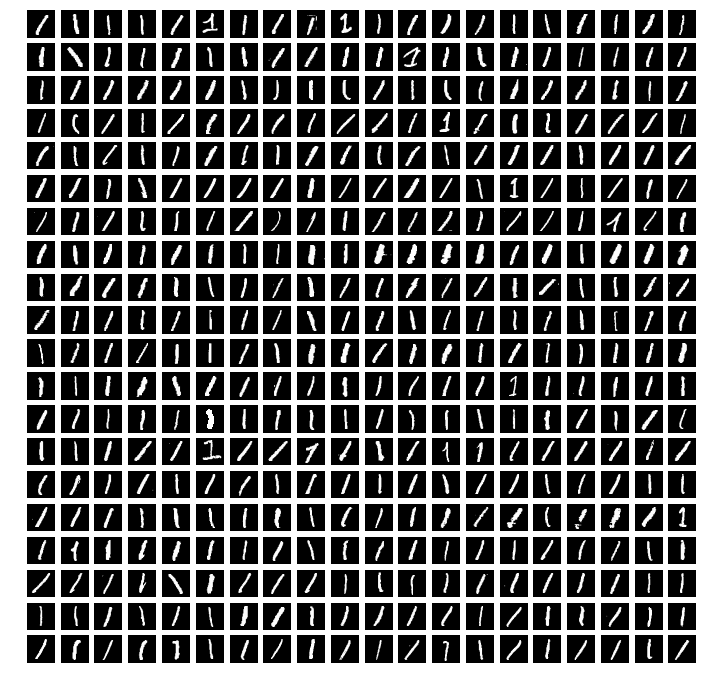

In [17]:
import numpy as np

nrowsIm = 20
ncolsIm = 20
numIm = nrowsIm*ncolsIm

digit=1
Indexes = np.where(train_labels==digit)[0][:numIm]

plt.figure(figsize=(12,12))
for i,idx in enumerate(Indexes[:numIm]):
    plt.subplot(nrowsIm,ncolsIm,i+1)
    plt.imshow(train_images[idx], 'gray')
    plt.axis('off')
    
plt.show()

* Normalizar los vectores

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

* Las etiquetas cambiar a formato categorico, a forma de variable indicadora (one hot encoding)

In [11]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

* Modelo secuencial 

In [12]:
from keras.models import Sequential
from keras.layers import Dense

nn = Sequential()
nn.add(Dense(512,                   # numero de neuronas en la capa
             activation = "relu",   # función de activación
             input_shape=(28*28,))) # forma de la entrada, la otra dimensión es 
                                    # el tamaño deñ lote
    
nn.add(Dense(10, activation = "softmax")) # capa de salida

nn.summary() # resumen de arquitectura




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
nn.compile(optimizer='nadam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

* Entrenando modelo

In [14]:
import time
tic=time.time()

history = nn.fit(train_images, train_labels, epochs=2, 
                 validation_split=0.2, batch_size=128)

print('Tiempo de procesamiento (secs): ', time.time()-tic)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 4s 84us/step - loss: 1.1025 - acc: 0.7355 - val_loss: 0.4927 - val_acc: 0.8755
Epoch 2/2
48000/48000 [==============================] - 2s 32us/step - loss: 0.4254 - acc: 0.8861 - val_loss: 0.3430 - val_acc: 0.9048
Tiempo de procesamiento (secs):  5.810339689254761


Nota: si vuelvo a dar entrenar, las epocas se acomulan, lo mejor es que si quieres ajustar de nuevo la arquitectura elimines el modelo con "del modelo_nombre"

Visualización

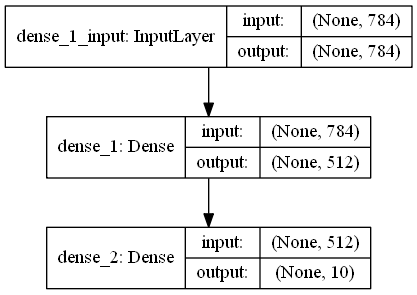

In [16]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(nn, to_file='TALLER.png',show_shapes=True, show_layer_names=True)
Image(retina=True, filename='TALLER.png')

Se puede eliminar el modelo

In [56]:
del nn

Tensor board te permiter visualizar el entrenamiento

**En Anaconda prompt:**

tensorboard --logdir=my_log_dir

**Despues ir:**

http://localhost:6006

In [ ]:
import keras 

callbacks = [keras.callbacks.TensorBoard(
    log_dir = 'my_log_dir',
    histogram_freq = 1,
    embeddings_freq = 1,
    embeddings_data = train_images
)]

history = nn.fit(train_images, train_labels, epochs=5, batch_size=128, 
                 validation_split=0.2, callbacks=callbacks)

* Utilizando datos de validación

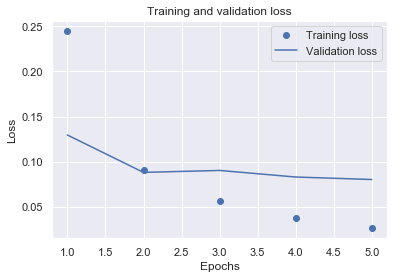

In [62]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

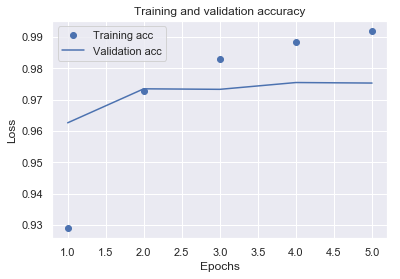

In [63]:
plt.clf()   
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

* Matriz de confusión

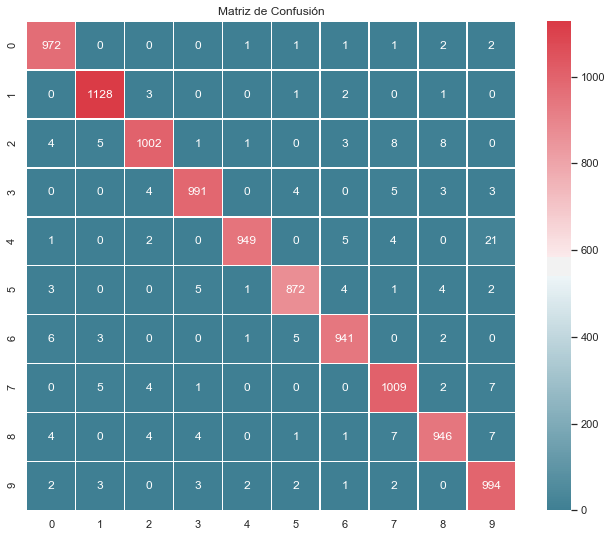

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import numpy as np

classes = nn.predict(test_images)

test_true_labels      = np.argmax(test_labels, axis=1)
test_predicted_labels = np.argmax(classes,axis=1)


C = confusion_matrix(test_true_labels, test_predicted_labels)


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')


plt.show()



In [65]:
test_loss, test_acc = nn.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 70us/step


Muy bueno!

In [66]:
print('test_acc:', test_acc)

test_acc: 0.9804
